In [155]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
from numpy import array
import re

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

import matplotlib.pyplot as plt

#One-to-Many Sequence Problems

###One-to-Many Sequence Problems with a Single Feature

Creating the Dataset

In [156]:
X = list()
Y = list()
X = [x+3 for x in range(-2, 43, 3)]

for i in X:
    output_vector = list()
    output_vector.append(i+1)
    output_vector.append(i+2)
    Y.append(output_vector)

print(X)
print(Y)

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
[[2, 3], [5, 6], [8, 9], [11, 12], [14, 15], [17, 18], [20, 21], [23, 24], [26, 27], [29, 30], [32, 33], [35, 36], [38, 39], [41, 42], [44, 45]]


In [157]:
print(type(X), type(Y))

<class 'list'> <class 'list'>


In [158]:
X = np.array(X).reshape(15, 1, 1)
Y = np.asarray(Y)

In [159]:
print(type(X), type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Solution via Simple LSTM

In [160]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=3, verbose=False)

dict_keys(['loss', 'val_loss'])


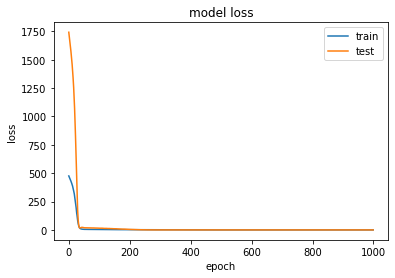

In [161]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [162]:
test_input = array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[10.998489 12.09827 ]]


Solution via Stacked LSTM

In [163]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [164]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


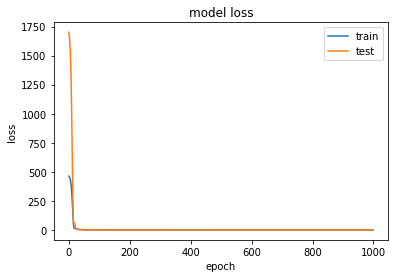

In [165]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [166]:
test_input = array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[11.009802 11.95721 ]]


Solution via Bidirectional LSTM

In [167]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, 1)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [168]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


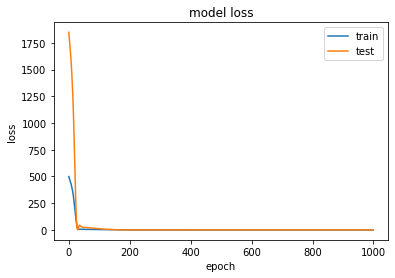

In [169]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [170]:
test_input = array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[10.977404  12.0608835]]


###One-to-Many Sequence Problems with Multiple Features

Creating the Dataset

In [171]:
nums = 25

X1 = list()
X2 = list()
X = list()
Y = list()

X1 = [(x+1)*2 for x in range(25)]
X2 = [(x+1)*3 for x in range(25)]

for x1, x2 in zip(X1, X2):
    output_vector = list()
    output_vector.append(x1+1)
    output_vector.append(x2+1)
    Y.append(output_vector)

X = np.column_stack((X1, X2))
print(X)

[[ 2  3]
 [ 4  6]
 [ 6  9]
 [ 8 12]
 [10 15]
 [12 18]
 [14 21]
 [16 24]
 [18 27]
 [20 30]
 [22 33]
 [24 36]
 [26 39]
 [28 42]
 [30 45]
 [32 48]
 [34 51]
 [36 54]
 [38 57]
 [40 60]
 [42 63]
 [44 66]
 [46 69]
 [48 72]
 [50 75]]


In [172]:
X = np.array(X).reshape(25, 1, 2)
Y = np.array(Y)
print(Y)

[[ 3  4]
 [ 5  7]
 [ 7 10]
 [ 9 13]
 [11 16]
 [13 19]
 [15 22]
 [17 25]
 [19 28]
 [21 31]
 [23 34]
 [25 37]
 [27 40]
 [29 43]
 [31 46]
 [33 49]
 [35 52]
 [37 55]
 [39 58]
 [41 61]
 [43 64]
 [45 67]
 [47 70]
 [49 73]
 [51 76]]


In [173]:
print(type(X), type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Solution via Simple LSTM

In [174]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


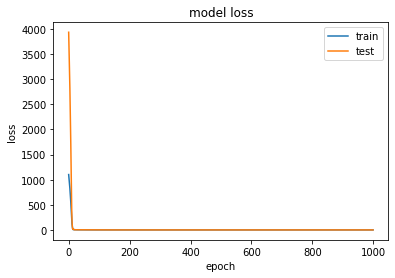

In [175]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [176]:
test_input = array([40, 60])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[40.935028 61.05449 ]]


Solution via Stacked LSTM

In [177]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 2)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [178]:
history = model.fit(X, Y, epochs=1000, validation_split=0.1, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


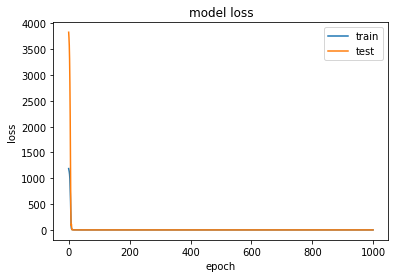

In [179]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [180]:
test_input = array([40, 60])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[40.993378 60.988556]]


Soltuion via Bidirectional LSTM

In [181]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [182]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


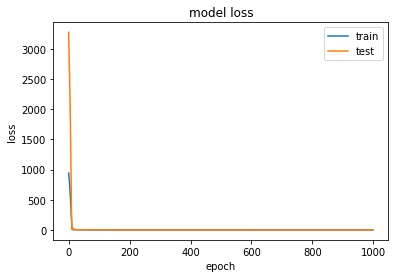

In [183]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [184]:
test_input = array([40, 60])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[41.04448 61.05108]]


#Many-to-Many Sequence Problems

###Many-to-Many Sequence Problems with a Single Feature

Creating the Dataset

In [185]:
X = list()
Y = list()
X = [x for x in range(5, 301, 5)]
Y = [y for y in range(20, 316, 5)]

X = np.array(X).reshape(20, 3, 1)
Y = np.array(Y).reshape(20, 3, 1)

In [186]:
print(X)
print(Y)

[[[  5]
  [ 10]
  [ 15]]

 [[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [295]
  [300]]]
[[[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [2

Solution via Stacked LSTM

In [187]:
model = Sequential()

# encoder layer
model.add(LSTM(100, activation='relu', input_shape=(3, 1)))

# repeat vector
model.add(RepeatVector(3))

# decoder layer
model.add(LSTM(100, activation='relu', return_sequences=True))

model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

print(model.summary())

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 100)               40800     
_________________________________________________________________
repeat_vector_12 (RepeatVect (None, 3, 100)            0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
time_distributed_12 (TimeDis (None, 3, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


In [188]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


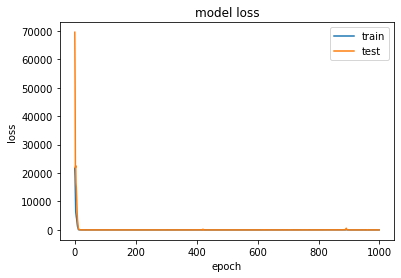

In [189]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [190]:
test_input = array([300, 305, 310])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[315.49863]
  [321.66064]
  [327.36615]]]


Solution via Bidirectional LSTM

In [197]:
# To avoid type error.
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [198]:
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(3, 1))))
model.add(RepeatVector(3))
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
#print(model.summary())

In [199]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


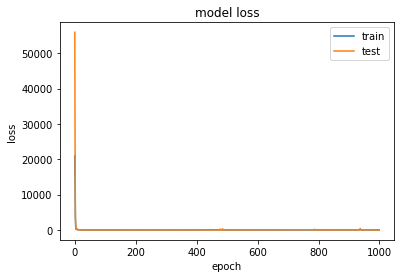

In [200]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [201]:
test_input = array([300, 305, 310])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[315.17596]
  [320.84216]
  [326.3512 ]]]


###Many-to-Many Sequence Problems with Multiple Features

Creating the Dataset

In [202]:
X = list()
Y = list()
X1 = [x1 for x1 in range(5, 301, 5)]
X2 = [x2 for x2 in range(20, 316, 5)]
Y = [y for y in range(35, 331, 5)]

X = np.column_stack((X1, X2))

In [203]:
X = np.array(X).reshape(20, 3, 2)
Y = np.array(Y).reshape(20, 3, 1)

In [204]:
print(X)
print(Y)

[[[  5  20]
  [ 10  25]
  [ 15  30]]

 [[ 20  35]
  [ 25  40]
  [ 30  45]]

 [[ 35  50]
  [ 40  55]
  [ 45  60]]

 [[ 50  65]
  [ 55  70]
  [ 60  75]]

 [[ 65  80]
  [ 70  85]
  [ 75  90]]

 [[ 80  95]
  [ 85 100]
  [ 90 105]]

 [[ 95 110]
  [100 115]
  [105 120]]

 [[110 125]
  [115 130]
  [120 135]]

 [[125 140]
  [130 145]
  [135 150]]

 [[140 155]
  [145 160]
  [150 165]]

 [[155 170]
  [160 175]
  [165 180]]

 [[170 185]
  [175 190]
  [180 195]]

 [[185 200]
  [190 205]
  [195 210]]

 [[200 215]
  [205 220]
  [210 225]]

 [[215 230]
  [220 235]
  [225 240]]

 [[230 245]
  [235 250]
  [240 255]]

 [[245 260]
  [250 265]
  [255 270]]

 [[260 275]
  [265 280]
  [270 285]]

 [[275 290]
  [280 295]
  [285 300]]

 [[290 305]
  [295 310]
  [300 315]]]
[[[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170

Solution via Stacked LSTM

In [205]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(3, 2)))
model.add(RepeatVector(3))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [206]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


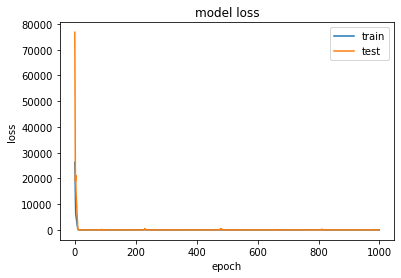

In [207]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [208]:
X1 = [300, 305, 310]
X2 = [315, 320, 325]

test_input = np.column_stack((X1, X2))

test_input = test_input.reshape((1, 3, 2))
print(test_input)

[[[300 315]
  [305 320]
  [310 325]]]


In [209]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[332.0999 ]
  [337.72214]
  [343.87   ]]]


Solution via Bidirectional LSTM

In [212]:
# To avoid type error.
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [213]:
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(3, 2))))
model.add(RepeatVector(3))
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [214]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=False, batch_size=3)

dict_keys(['loss', 'val_loss'])


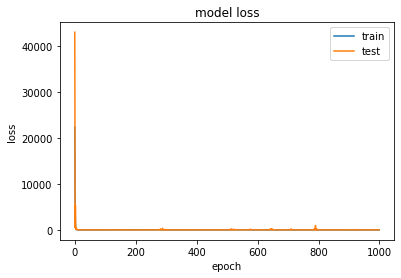

In [215]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [216]:
X1 = [300, 305, 310]
X2 = [315, 320, 325]

test_input = np.column_stack((X1, X2))

test_input = test_input.reshape((1, 3, 2))
print(test_input)

[[[300 315]
  [305 320]
  [310 325]]]


In [217]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[332.94028]
  [338.5943 ]
  [344.42947]]]
